# Lab8 - Cluster Analysis with R
Clustering a set of    objects into    groups is usually moved by the aim of identifying internally homogenous groups according to a specific set of variables. In order to accomplish this objective, the starting point is computing a matrix, called dissimilarity matrix, which contains information about the dissimilarity of the observed units. According to the nature of the observed variables (quantitative, qualitative, binary or mixed type variables), we can define and use different measures of dissimilarity. 

1) Repeat the following examples

2) Apply complete clustering analysis to Lab8_priorities_perifereion dataset

## Example 1
Data Longley contained in the R-package AER consists of the number of people employed from 1947-1962.

In [1]:
# Libraries & Preparation
install.packages('AER')
library(AER)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: car
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: survival


[1] 60.323 61.122 60.171 61.187 63.221 63.639 64.989 63.761 66.019 67.857
[11] 68.169 66.513 68.655 69.564 69.331 70.551


Call:
hclust(d = dist.l, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 16 



-2,-4
-6,-8
-1,-3
-14,-15
-10,-11
-9,-12
-5,2
-13,5
1,3
-16,4
-7,6


[1] "Note that the minus in front of the unit number indicates that this is a single observation being merged;\nwhereas numbers alone indicate the step at which the considered clusters were built."


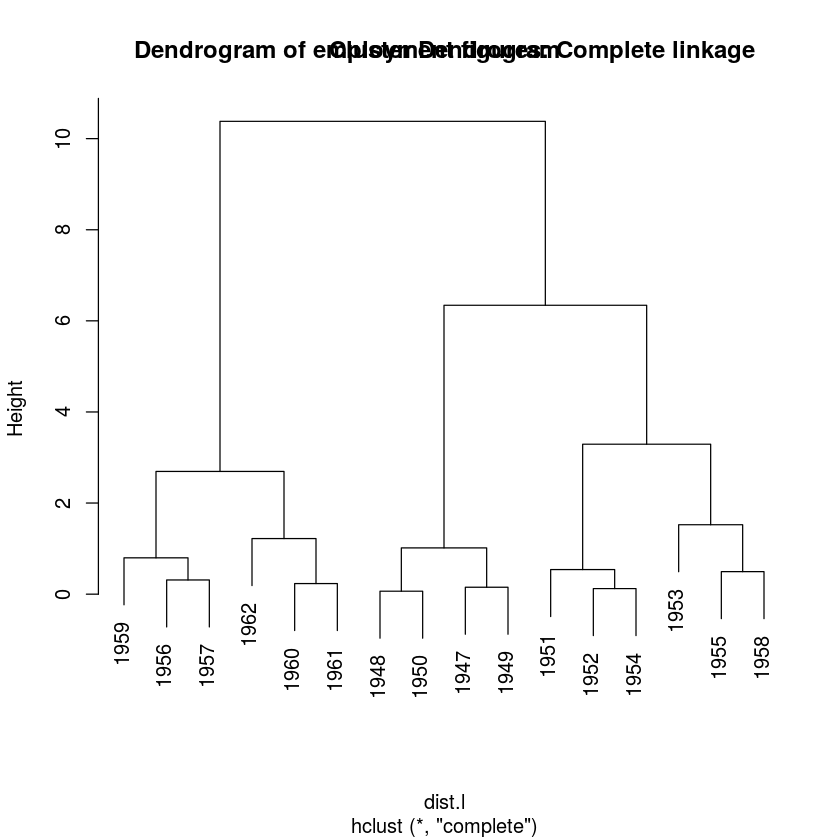

In [2]:
# Dataset Init
data("Longley")
longley<-as.data.frame(Longley)
x<-longley$employment/1000
x
label.x<-as.character(c(1947:1962))

# Calculate the dissimilarity between observations using the Euclidean distance
dist.l<-dist(x,method="euclidean")

# Compute a hierarchical cluster analysis on the distance matrix using the complete linkage method
h<-hclust(dist.l, method="complete")
print(h)

# In order to see all the steps of the clustering type:
h$merge

print("Note that the minus in front of the unit number indicates that this is a single observation being merged;
whereas numbers alone indicate the step at which the considered clusters were built.")

# Create a plot of the clustering tree
plot(h,labels=label.x) # 'plclust' is deprecated
title("Dendrogram of employment figures: Complete linkage")


What is an appropriate number of clusters according to this plot?

A common choice is to cut the tree by the largest difference of  heights between two nodes. The height values are contained in the output of hclust function:

In [3]:
h.cl<-h$height # height values
h.cl

[1]  0.065  0.122  0.152  0.233  0.312  0.494  0.540  0.798  1.016  1.220
[11]  1.524  2.694  3.292  6.342 10.380

In [4]:
h.cl2<-c(0,h.cl[-length(h.cl)]) # vector that has to be substracted from h.cl
round(h.cl-h.cl2,3) # differences in height, rounded at the 3rd digit
max(round(h.cl-h.cl2,3)) # the largest increase
which.max(round(h.cl-h.cl2,3)) # the step of the largest increase

[1] 0.065 0.057 0.030 0.081 0.079 0.182 0.046 0.258 0.218 0.204 0.304 1.170
[13] 0.598 3.050 4.038

[1] 4.038

[1] 15

According to this approach, the appropriate number of cluster is two, because the largest difference is at the last step of the merging process.


Call:
hclust(d = dist.l, method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 16 



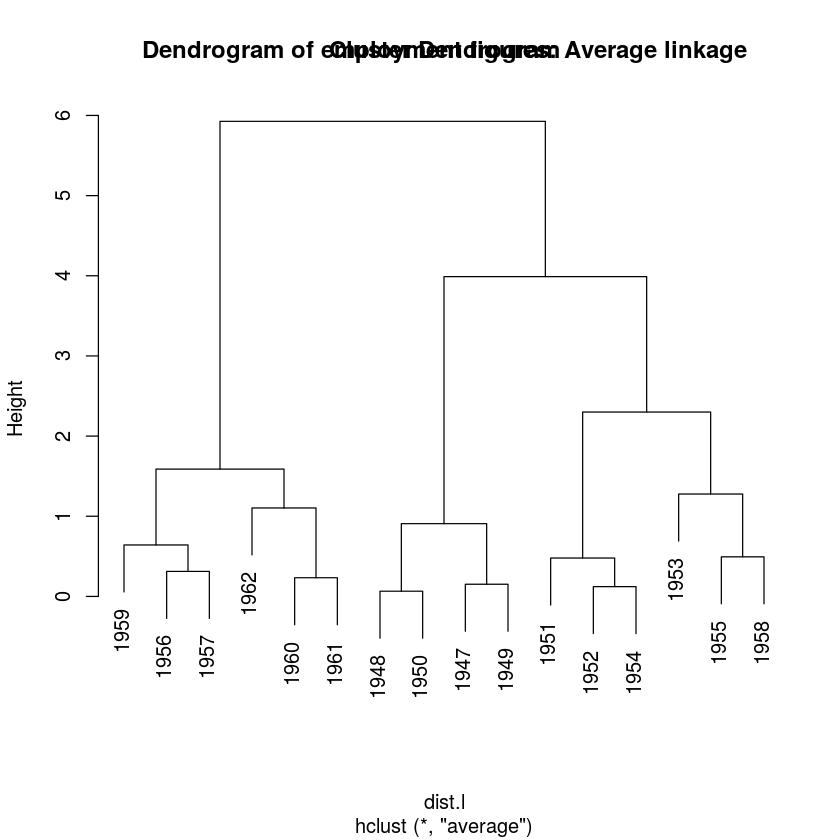

In [5]:
# Compute a hierarchical cluster analysis on the distance matrix using the average linkage method:

h<-hclust(dist.l,method="average")
print(h)

plot(h,labels=label.x) # 'plclust' is deprecated
title("Dendrogram of employment figures: Average linkage")


In order to choose where to cut the tree, the differences in the height values are evaluated:

[1] 0.065000 0.122000 0.152000 0.233000 0.312000 0.479000 0.494000 0.642000
 [9] 0.907500 1.103500 1.277000 1.588333 2.300000 3.989583 5.926667

[1] 0.065 0.057 0.030 0.081 0.079 0.167 0.015 0.148 0.265 0.196 0.173 0.311
[13] 0.712 1.690 1.937

[1] 1.937

[1] 15

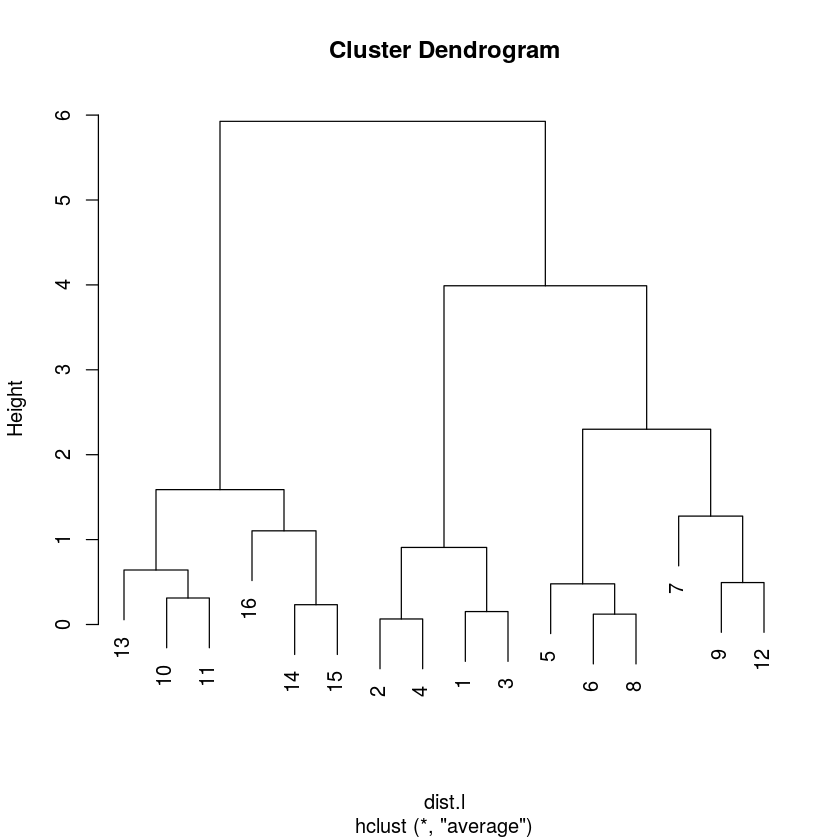

In [6]:
h.cl<-h$height # height values
h.cl
h.cl2<-c(0,h.cl[-length(h.cl)]) # vector that has to be substracted from h.cl
round(h.cl-h.cl2,3) # differences in height, rounded at the 3rd digit
max(round(h.cl-h.cl2,3)) # the largest increase
which.max(round(h.cl-h.cl2,3)) # the step of the largest increase
plot(h)


## Example 2

Consider data set `lifeexp.dat`. It contains life expectancy in the 1960s distinguished by country, age and sex.

Perform single, complete and average linkage agglomerative hierarchical cluster based on the Euclidean distance measure and produce suitable plots.

Warning message in dist(life):
“NAs introduced by coercion”Warning message in dist(life):
“NAs introduced by coercion”Warning message in dist(life):
“NAs introduced by coercion”

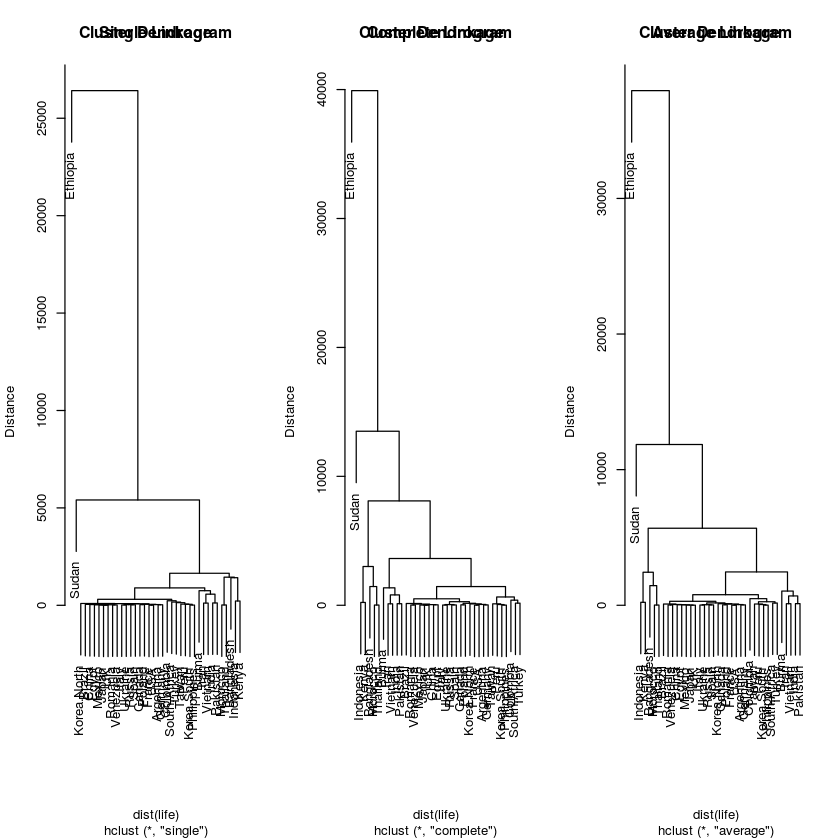

In [16]:
life<-read.table("./lifeexp.dat",header=TRUE, fill = TRUE, row.names = NULL)
#life <- read.delim("./lifeexp.dat", sep=" ", fill=TRUE) 

life = life[complete.cases(life),]
#life[life==""] <- NA
#life
rownames(life)<-life[,1]
country <-rownames(life)

par(mfrow=c(1,3))
plot(hclust(dist(life), method="single"), labels=country , ylab="Distance")
title("Single Linkage")
plot(hclust(dist(life), method="complete"), labels=country, ylab="Distance")
title("Complete Linkage")
plot(hclust(dist(life), method="average"), labels=country , ylab="Distance")
title("Average Linkage")

The singe linkage method shows a high degree of asymmetry – an example of 'chaining', i.e. result of
'prematurely'  combining  individuals/clusters  using  the  minimum  distance  criteria  which  defines  single linkage.

The complete linkage method is much more balanced in the way it forms clusters, producing four or five clear clusters.

The average linkage method returns clusters which again show asymmetry, but not as pronounced as single linkage.

Suppose to cut the complete linkage dendrogram at height 8: it would yield 4 clusters. Try to construct four clusters using the k-means algorithm as follows:

In [15]:

clusters.km <- kmeans(life,4) 
country.clus.km <- lapply(1:4,function(nc) 
country[clusters.km$cluster==nc])
    

Warning message in kmeans(life2, 4):
“NAs introduced by coercion”

ERROR: Error in do_one(nmeth): NA/NaN/Inf in foreign function call (arg 1)


## Example 3
Consider again the `sparrowElphick` dataset. Now try to use the k-means cluster analysis to check whether there are two clusters,
one containing the sparrows which survived and the other the sparrows which died.

Using the R-function kmeans(), select two clusters and obtain the following output:

In [21]:
sparrows<-read.table("./SparrowsElphic.txt",header=TRUE)
kmeans(sparrows, 2)

Warning message in file(file, "rt"):
“cannot open file './SparrowsElphic.txt': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


Do the two clusters contain dead/alive sparrows respectively? No.
Run now the k-means clustering allowing the number of clusters to vary from 2 to 5 and compare the results in terms of ASW and PG indexes.

ASW and PG indexes can be obtained with the function cluster.stats, in package fpc.

In [ ]:
# Libraries 
install.packages('fpc')
library(fpc)

In [ ]:
?cluster.stats
dist.data<-dist(sparrows,"euclidean")
cl2<-kmeans(sparrows, 2)
out.cl2<-cluster.stats(dist.data,cl2$cluster)
out.cl2$avg.silwidth

According to the values of the two indexes, the k-means with two clusters produces more homogenous groups; the second best choice would be fixing the number k of clusters equal to 3.

A meaningful representation of the clustering outcome is the so called 'silhouette plot'. On the x-axis it shows the silhouette width for each observation in the corresponding cluster; units in the same cluster are plotted in decreasing order according to their silhouette value. Different clusters are separately plotted. Furthermore, it reports the number of observations in each cluster and the average silhouette width of the classification.

In  order  to  produce  a  silhouette  plot  we  need  to  load  the  cluster library  and  to  use  function
silhouette:

In [22]:
library(cluster)
sil<-silhouette(cl2$cluster,dist.data)
plot(sil,cex.names=0.6,nmax=98,main="Silhouette Plot for 'Sparrows' dataset, k=2")

ERROR: Error in silhouette(cl2$cluster, dist.data): object 'cl2' not found


Or, with coloured clusters:



In [ ]:
plot(sil,cex.names=0.6,nmax=98,main="Silhouette Plot for 'Sparrows' dataset, k=2", col=c("red","green"))